<img src="./images/高等数学与数值计算.png">

### 1.求一元函数的最优解

In [3]:
from sympy import *

n = symbols('n')  # n为符号变量
y = 1250 * (2 - exp(-(n-5000)**2))
y


2500 - 1250*exp(-(n - 5000)**2)

In [4]:
# 求导数
diff1 = diff(y, n)
diff1

-1250*(10000 - 2*n)*exp(-(n - 5000)**2)

In [5]:
# 计算驻点, solve函数返回的是一个列表
solve(diff(y, n), n)

[5000]

In [6]:
# 计算二阶导数
diff2 = diff(y, n, 2)
diff2

2500*(1 - 2*(n - 5000)**2)*exp(-(n - 5000)**2)

In [7]:
# 计算驻点的二阶导数值
diff2.evalf(subs = {n:5000})

2500.00000000000

### 2.求多元函数的极值
多元函数极值及其求法
> 极大值、极小值统称为极值，使得函数取得极值的点称为极值点。

> 驻点: 能使一阶偏导数同时为0的点。

> 极值的必要条件: 一个函数z=f(x, y)在点(x0, y0)具有偏导数，且在该点有极值, 则它在该点的偏导数必然为零。fx(x0, y0) = 0, fy(x0, y0) = 0

> 推广到三元: 三元函数在一点有偏导数, 需满足三个条件: fx(x0, y0, z0) = 0, fy(x0, y0, z0) = 0, fz(x0, y0, z0) = 0

> 方法: 1.求驻点 2.判别，求二阶偏导数的各个点

In [29]:
from sympy import *

x, y, z = symbols('x y z')
# 函数 z = 3 * x**2 + 4 * y**2的极小值点
z = 3*x**2 + 4*y**2
z

3*x**2 + 4*y**2

In [21]:
# 求解方程组
from sympy import *

x, y = symbols('x y')
f1 = x + y - 3
f2 = x - y + 5
# Solve函数的第一个参数是要解的方程，要求右端等于0，第二个参数是未知数。
solve([f1, f2], [x, y])

{x: -1, y: 4}

### 3.计算定积分

In [31]:
from scipy import integrate
from scipy import pi

def f(x):
    return x ** 2
 # 已知函数表达式积分
v, err = integrate.quad(f, 0, 1) # 被积函数与积分区间
v

0.33333333333333337

### 4.三次样条插值法的代码实现

模拟网速曲线<br>

<img src="./images/wangsu.png" width = 200>

参数计算完成：-0.27448708201783356
参数已保存...
[66, 66, 65, 64, 63, 63, 62, 61, 60, 59, 58, 58, 58, 58, 58, 57, 57, 57, 57, 58, 60, 64, 67, 68]


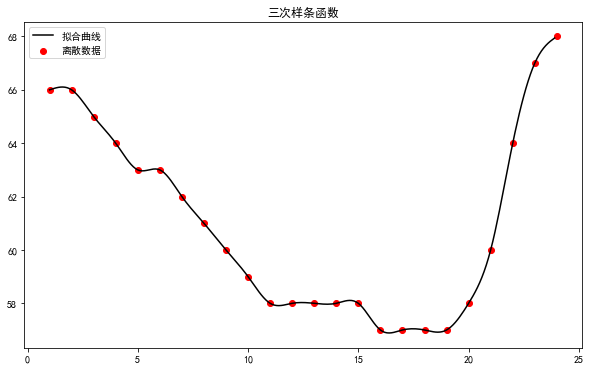

In [32]:
# 参考多肉罗罗code
import pickle
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['font.sans-serif'] = "SimHei"
plt.rcParams['axes.unicode_minus'] = False

def calculateEquationParameters(x):
    """
    完成对三次样条函数求解方程参数的输入
    :param x: 需要进行三次样条曲线计算的自变量
    :return: 方程的参数，总共应该是4*区间个数
    """

    # 区间个数 = 点的个数 - 1
    size_of_interval = len(x) - 1
    # parameters为二维数组，存放所有的参数
    parameters = []

    # 首先需要输入方程分段连接处的方程，共有2*n(区间个数)-2个方程
    i = 1
    while i < len(x) - 1:
        # 这里我们需要获得分段连接处三次曲线的方程参数，形如ax^3+bx^2+cx+d=0
        # 这四个参数应该是x^3,x^2,x,1，我们需要求解的是关于a,b,c,d的线性方程。
        data = [0] * (size_of_interval * 4)
        data[(i - 1) * 4] = x[i] * x[i] * x[i]
        data[(i - 1) * 4 + 1] = x[i] * x[i]
        data[(i - 1) * 4 + 2] = x[i]
        data[(i - 1) * 4 + 3] = 1

        # 因为分段连接处结点在两条曲线中，对于另一条曲线，也有类似的参数方程。
        data_next = [0] * (size_of_interval * 4)
        data_next[i * 4] = x[i] * x[i] * x[i]
        data_next[i * 4+ 1] = x[i] * x[i]
        data_next[i * 4 + 2] = x[i]
        data_next[i * 4 + 3] = 1

        parameters.append(data)
        parameters.append(data_next)
        i += 1

    # 输入端点处的函数值。为两个方程,加上前面的2n-2个方程，一共2n个方程
    # 第一个端点
    data_first_point = [0] * (size_of_interval * 4)
    data_first_point[0] = x[0] * x[0] * x[0]
    data_first_point[1] = x[0] * x[0]
    data_first_point[2] = x[0]
    data_first_point[3] = 1
    parameters.append(data_first_point)
    # 最后一个端点
    data_last_point = [0] * (size_of_interval * 4)
    data_last_point[-4] = x[-1] * x[-1] * x[-1]
    data_last_point[-3] = x[-1] * x[-1]
    data_last_point[-2] = x[-1]
    data_last_point[-1] = 1
    parameters.append(data_last_point)

    # 节点处的斜率相等，共有n-1个方程，加上前面的2n个方程，也就是3n-1个方程
    i = 1
    while i < len(x) - 1:
        # 这里我们需要获得分段连接处三次曲线的方程参数，形如ax1^3+bx1^2+cx1+d=0
        # 对于某个点x，其分别位于两条三次曲线a1x^3+b1x^2+c1x+d1=0以及a2x^3+b2x^2+c2x+d2=0
        # 节点处的斜率相等，也就是3a1x^2+2b1x+c1=3a2x^2+2b2x+c2，即3a1x^2+2b1x+c1-3a2x^2+2b2x+c2=0
        # 因此参数应该为3x^2,2x,1,-3x^2,-2x,-1，因为我们需要求解的是关于a1,b1,c1,a2,b2,c2的方程。
        data = [0] * (size_of_interval * 4)
        data[(i - 1) * 4] = 3 * x[i] * x[i]
        data[(i - 1) * 4 + 1] = 2 * x[i]
        data[(i - 1) * 4 + 2] = 1
        data[i * 4] = -3 * x[i] * x[i]
        data[i * 4 + 1] = -2 * x[i]
        data[i * 4 + 2] = -1

        parameters.append(data)
        i += 1

    # 节点处的曲率要相等，共有n-1个方程，加上前面的3n-1个方程，也就是4n-2个方程
    i = 1
    while i < len(x) - 1:
        # 这里我们需要获得分段连接处三次曲线的方程参数，形如ax1^3+bx1^2+cx1+d=0
        # 对于某个点x，其分别位于两条三次曲线a1x^3+b1x^2+c1x+d1=0以及a2x^3+b2x^2+c2x+d2=0
        # 节点处的曲率要相等，也就是6a1x+2b1=6a2x+2b2，也就是6a1x+2b1-6a2x+2b2=0
        # 因此参数应该为6x,2,-6x,-2，因为我们需要求解的是关于a1,b1,a2,b2的方程
        data = [0] * (size_of_interval * 4)
        data[(i - 1) * 4] = 6 * x[i]
        data[(i - 1) * 4 + 1] = 2
        data[i * 4] = -6 * x[i]
        data[i* 4 + 1] = -2

        parameters.append(data)
        i += 1

    # 这里我们人为添加了两个关于首尾端点的曲率方程，也就是6a1x1+2b1=0以及6a_24x_24+2b_24=0
    # 第一个端点处曲率为0
    data_first_curvature = [0] * (size_of_interval * 4)
    data_first_curvature[0] = 6 * x[0]
    data_first_curvature[1] = 2
    parameters.append(data_first_curvature)

    # 最后一个端点曲率为0
    data_last_curvature = [0] * (size_of_interval * 4)
    data_last_curvature[-4] = 6 * x[-1]
    data_last_curvature[-3] = 2
    parameters.append(data_last_curvature)

    return parameters

def solutionOfEquation(parameters, x, y):
    """
    计算样条函数的系数。
    :param parameters: 方程的系数——就是我们在上一个函数中的返回值
    :param x: 要插值函数的自变量
    :param y: 要插值函数的因变量
    :return: 三次插值函数的系数a,b,c,d
    """

    # 区间个数 = 点的个数 - 1
    size_of_interval = len(x) - 1
    # result对应92个方程等式右边的值
    result = [0] * (size_of_interval * 4)

    i = 1
    while i < size_of_interval:
        # 因为关于一阶导数二阶导数方程右边全为0，所以我们只需要关注不为0的情况，也就是端点处的函数值
        # 在循环中主要是解决了内部端点
        result[(i - 1) * 2] = y[i]
        result[(i - 1) * 2 + 1] = y[i]

        i += 1

    # 还需要对应上首尾端点，我们在前面添加的时候其实是在2n-2个方程之后添加的
    # 第一个端点
    result[2 * (size_of_interval - 1)] = y[0]
    # 最后一个端点
    result[2 * (size_of_interval - 1) + 1] = y[-1]

    # 求解
    a = np.array(calculateEquationParameters(x))
    b = np.array(result)
    return np.linalg.solve(a, b)


def calculate(parameters, x):
    """
    根据所给参数，计算三次函数的函数值
    :param parameters: 为三次函数的系数
    :param x: 自变量
    :return: 三次函数的函数值
    """
    result = []
    for data_x in x:
        result.append(parameters[0] * (data_x ** 3) + parameters[1] * (data_x ** 2) + parameters[2] * (data_x) + parameters[3])
    return result

def get_new_data(result, x):
    """
    由拉格朗日插值函数计算的值
    :param result: 样条函数的系数
    :param x: x为函数的自变量
    :return: 返回新生成的连续值
    """
    new_data_x = []
    new_data_y = []

    for i, xi in enumerate(x[:-1]):
        new_data_xi = np.arange(x[i], x[i + 1] if i + 1 < len(x) else x[i] + 0.5, 0.1)
        new_data_yi = calculate([result[i * 4], result[i * 4 + 1], result[i * 4 + 2], result[i * 4 + 3]], new_data_xi)
        new_data_x.extend(new_data_xi)
        new_data_y.extend(new_data_yi)

    return new_data_x, new_data_y

def plot_data(data_x, data_y, new_data_x, new_data_y):
    """
    将函数绘制成图像
    :param data_x: 自变量取值（离散点）
    :param data_y: 因变量取值（离散点）
    :param new_data_x: 自变量取值（间隔很小，近乎连续）
    :param new_data_y: 拉格朗日插值函数计算的值
    :return: None
    """
    plt.subplots(figsize=(10,6))
    plt.plot(new_data_x, new_data_y, label="拟合曲线", color="black")
    plt.scatter(data_x, data_y, label="离散数据", color="red")
    plt.title("三次样条函数")
    plt.legend(loc="upper left")
    plt.show()


x = [i for i in range(1, 25)]
s = [66, 66, 65, 64, 63, 63, 62, 61, 60, 59, 58, 58, 58, 58, 58, 57, 57, 57, 57, 58, 60, 64, 67, 68]

result = solutionOfEquation(calculateEquationParameters(x), x, s)
print(f"参数计算完成：{result[0]}")
# 将参数保存到pickle
with open('parameters.pkl', 'wb') as f:
    pickle.dump(result, f)
print("参数已保存...")
new_data_x, new_data_y = get_new_data(result, x)
print(s)
plot_data(x, s, new_data_x, new_data_y)

### 5.实战项目——人口增长问题

GitModel 公司对面试的实习生给出了这样一个问题 : 搜集 $1950\sim 2020$ 年间美国人口数据$,$ 猜测其满足的函数关系$,$ 并综合数据预测美国 $2030$ 年的人口数.

公司希望实习生就以下的<strong>开放性</strong>问题给出自己的想法，公司要求实习生<strong>提交预测的思路$,$ 模型$,$ 算法以及结果</strong>.

面试官给出了如下提示 : 预测值与真实值存在误差$,$ 该问题如何转化为可用上述所学的知识解决的问题呢? 

你认为美国人口与时间的关系应该满足怎样的函数关系? 这样的函数你能否找到? 又怎么衡量这个函数具有良好的预测效果?



数据收集：通过上网搜索，获取美国人1950 到 2020 年 1950到2020年1950到2020年的人口数据

In [33]:
import pandas as pd

df = pd.read_csv('./data/US_POPULATION.csv')
df

,year,population
0,1950,158804397
1,1951,160872264
2,1952,163266026
3,1953,165909996
4,1954,168736390
...,...,...
66,2016,323015992
67,2017,325084758
68,2018,327096263
69,2019,329064917


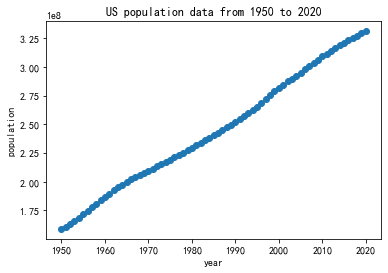

In [34]:
year = df['year']
population = df['population']
plt.scatter(year, population)
plt.xlabel('year')
plt.ylabel('population')
plt.title('US population data from 1950 to 2020')
plt.show()

可做线性模型, 时间暂时不够了, 后面再做